#Load data to Colab

### Connect to Google Drive to the path where dataset is stored

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive/", force_remount=True)

mypath = "drive/MyDrive/"
os.listdir(mypath)

Mounted at /content/drive/


['Colab Notebooks',
 '.ipynb_checkpoints',
 'CS598DLHProject',
 'original_paper_data',
 'copy',
 'CS410Project']

## Initialize relevant data URIs

In [ ]:
DATA_DIR = mypath + "CS410Project/Datasets/"

STOCK_DATA_CSV_ZIP = "stock_data.csv"

##Import required dependencies required for data exploration and data cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Read CSV data and print first 5 records

In [ ]:
data=pd.read_csv(DATA_DIR + STOCK_DATA_CSV_ZIP)
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


### Print the metadata about the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


##Checking for null data

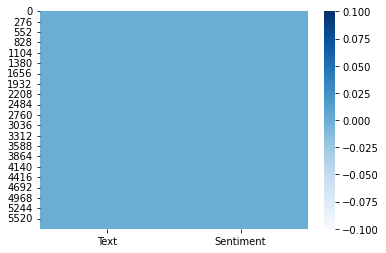

In [ ]:
sns.heatmap(data.isnull(),cmap='Blues')

### Print data distribution between both the categories. Positive and Negative

In [ ]:
data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

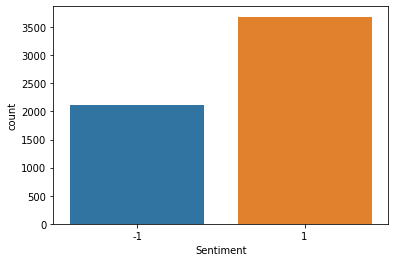

In [ ]:
sns.countplot(x=data['Sentiment'])

### Print and describe data distribution based on each category

In [ ]:
data.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
-1         2106   2106  AAP - user if so then the current downtrend wi...    1
 1         3685   3685  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...    1

## Create new field 'Length' which has the length of the tweet


In [ ]:
data['Length']=data['Text'].apply(lambda x:len(x))

##Data binning to figure out distribution of tweet lengths

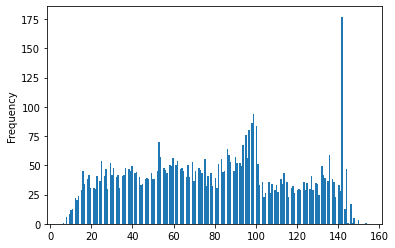

In [ ]:
data['Length'].plot.hist(bins=200)

In [ ]:
data['Length'].describe()


count    5791.000000
mean       78.507857
std        37.409135
min         6.000000
25%        48.000000
50%        79.000000
75%       106.000000
max       154.000000
Name: Length, dtype: float64

## Data binning by sentiments (Positive/Negative)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95a1d98190>,
      dtype=object)

<Figure size 864x360 with 0 Axes>

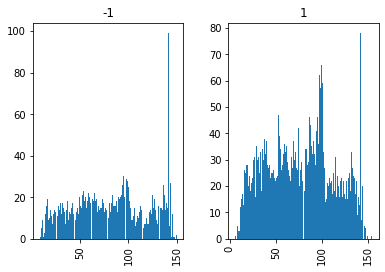

In [ ]:
plt.figure(figsize=(12,5))
data.hist(column='Length',by='Sentiment',bins=150)

## Import Stopwords corpus for cleaning tweets

In [ ]:
import string
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean(text):
    a=[f for f in text if f not in string.punctuation]
    a=''.join(a)
    b=[w for w in a.split() if w.lower() not in stopwords.words('english')]
    return b

In [ ]:
# Test clean function on 1 tweet
check=data['Text'].head(1).apply(clean)


In [ ]:
# Test
print(check[0])

['Kickers', 'watchlist', 'XIDE', 'TIT', 'SOQ', 'PNK', 'CPW', 'BPZ', 'AJ', 'trade', 'method', '1', 'method', '2', 'see', 'prev', 'posts']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# # Cleaning all our data set from punctuations and stopwords
# words=CountVectorizer(analyzer=clean).fit(data['Text'])
# print(len(words.vocabulary_))


# Approach

## Data cleaning, vectorization and transformation

Split data into train, test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['Text'],data['Sentiment'],test_size=0.3,random_state=101)


Count vectorization

In [ ]:
cv = CountVectorizer(analyzer=clean)

In [ ]:
words = cv.fit(x_train)

In [ ]:
tweets=words.transform(x_train)
print(tweets.shape)

(4053, 10730)



## TFIDF transformer

Perform TFIDF transformation on the vectorized data.

In [ ]:
tf=TfidfTransformer()
tf.fit(tweets)

TfidfTransformer()

In [ ]:
final_transform=tf.transform(tweets)

# Classifiers

## Logistic Regression

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). Logistic regression model predicts P(Y=1) as a function of X.

Build model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
modelfitting = classifier.fit(final_transform, y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.42      0.77      0.54       342
           1       0.93      0.73      0.82      1396

    accuracy                           0.74      1738
   macro avg       0.67      0.75      0.68      1738
weighted avg       0.83      0.74      0.77      1738

##################################################
############# Confusion Matrix ##############
[[ 264   78]
 [ 371 1025]]
##################################################


## Support Vector Machine

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

The followings are important concepts in SVM −

1. **Support Vectors** − Datapoints that are closest to the hyperplane is called support vectors. Separating line will be defined with the help of these data points.

2. **Hyperplane** − As we can see in the above diagram, it is a decision plane or space which is divided between a set of objects having different classes.

3. **Margin** − It may be defined as the gap between two lines on the closet data points of different classes. It can be calculated as the perpendicular distance from the line to the support vectors. Large margin is considered as a good margin and small margin is considered as a bad margin.

The main goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH)

Build model

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.42      0.82      0.56       326
           1       0.95      0.74      0.83      1412

    accuracy                           0.75      1738
   macro avg       0.68      0.78      0.69      1738
weighted avg       0.85      0.75      0.78      1738

##################################################
############# Confusion Matrix ##############
[[ 267   59]
 [ 368 1044]]
##################################################


## Decision Tree Classifier

Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. The two main entities of a tree are decision nodes, where the data is split and leaves, where we got outcome.

Build model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.60      0.59      0.60       646
           1       0.76      0.77      0.76      1092

    accuracy                           0.70      1738
   macro avg       0.68      0.68      0.68      1738
weighted avg       0.70      0.70      0.70      1738

##################################################
############# Confusion Matrix ##############
[[382 264]
 [253 839]]
##################################################


## Multinomial Naive Bayes Classifier

Naïve Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent to each other. In simple words, the assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class.

In Bayesian classification, the main interest is to find the posterior probabilities

Build model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.27      0.85      0.41       205
           1       0.97      0.70      0.81      1533

    accuracy                           0.72      1738
   macro avg       0.62      0.77      0.61      1738
weighted avg       0.89      0.72      0.77      1738

##################################################
############# Confusion Matrix ##############
[[ 174   31]
 [ 461 1072]]
##################################################


## Stochastic Gradient Descent Classifier

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate)

Build model

In [ ]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.61      0.68      0.65       567
           1       0.84      0.79      0.81      1171

    accuracy                           0.75      1738
   macro avg       0.72      0.74      0.73      1738
weighted avg       0.76      0.75      0.76      1738

##################################################
############# Confusion Matrix ##############
[[388 179]
 [247 924]]
##################################################


## K Nearest Neighbours Classifier

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

Build model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.51      0.67      0.58       483
           1       0.86      0.75      0.80      1255

    accuracy                           0.73      1738
   macro avg       0.69      0.71      0.69      1738
weighted avg       0.76      0.73      0.74      1738

##################################################
############# Confusion Matrix ##############
[[326 157]
 [309 946]]
##################################################


## Random Forest Classifier

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Build model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.53      0.72      0.61       470
           1       0.88      0.77      0.82      1268

    accuracy                           0.75      1738
   macro avg       0.71      0.74      0.72      1738
weighted avg       0.79      0.75      0.76      1738

##################################################
############# Confusion Matrix ##############
[[339 131]
 [296 972]]
##################################################


## Gradient Boosting Classifier

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

Build model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.33      0.76      0.46       276
           1       0.94      0.71      0.81      1462

    accuracy                           0.72      1738
   macro avg       0.64      0.74      0.63      1738
weighted avg       0.84      0.72      0.75      1738

##################################################
############# Confusion Matrix ##############
[[ 210   66]
 [ 425 1037]]
##################################################


## XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

Build model

In [ ]:
from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier()
modelfitting=classifier.fit(final_transform,y_train)


Prediction

In [ ]:
# Predictions

# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)

print ("############# Classification Report ##############")
print(classification_report(y_predict,y_test))
print ("##################################################")

print ("############# Confusion Matrix ##############")
print(confusion_matrix(y_predict,y_test))
print ("##################################################")


(1738, 10730)
(1738, 10730)
(1738,)
############# Classification Report ##############
              precision    recall  f1-score   support

          -1       0.38      0.72      0.50       333
           1       0.92      0.72      0.81      1405

    accuracy                           0.72      1738
   macro avg       0.65      0.72      0.65      1738
weighted avg       0.81      0.72      0.75      1738

##################################################
############# Confusion Matrix ##############
[[ 241   92]
 [ 394 1011]]
##################################################


# Classifier testing section

Classifier on input

Multinomial Naive Bayes Classifier

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier()

# from sklearn.svm import SVC
# classifier = SVC()

# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB()

# from sklearn.linear_model import SGDClassifier
# classifier = SGDClassifier()

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier()

# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()

# from sklearn.ensemble import GradientBoostingClassifier
# classifier = GradientBoostingClassifier()

from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier()


In [ ]:
modelfitting=classifier.fit(final_transform,y_train)

Prediction on Test data

In [ ]:
# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)



(1738, 10730)
(1738, 10730)
(1738,)


In [ ]:
# print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

          -1       0.38      0.72      0.50       333
           1       0.92      0.72      0.81      1405

    accuracy                           0.72      1738
   macro avg       0.65      0.72      0.65      1738
weighted avg       0.81      0.72      0.75      1738



In [ ]:
# print(confusion_matrix(y_predict,y_test))


[[379 252]
 [256 851]]


In [ ]:
# print(accuracy_score(y_predict,y_test))


0.716915995397008
